In [15]:
import pandas as pd
import numpy as np
from umap import UMAP
from matplotlib import pyplot as plt
import matplotlib
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from mpl_toolkits.mplot3d import Axes3D


In [2]:
healthy_encodings = pd.read_csv("Healthy_Gene_freq_encoding.csv")

In [3]:
cancer_encodings = pd.read_csv("Gene_freq_encoding_FULL.csv")

In [4]:
healthy_encodings.shape

(2504, 30547)

In [5]:
cancer_encodings.shape

(5987, 30401)

In [6]:
gene_labels = [col for col in cancer_encodings.columns if col.startswith("ENSG")]

In [7]:
healthy_gene_labels = [col for col in healthy_encodings.columns if col.startswith("ENSG")]

In [8]:
shared_gene_labels = list(set(healthy_gene_labels).intersection(set(gene_labels)))

In [9]:
len(shared_gene_labels)

30085

In [10]:
healthy_encodings = healthy_encodings[["CancerType"]+shared_gene_labels]
cancer_encodings = cancer_encodings[["CancerType"]+shared_gene_labels]

In [11]:
merged_encodings = pd.concat([cancer_encodings, healthy_encodings])

In [12]:
merged_encodings

,CancerType,ENSG00000089123,ENSG00000117472,ENSG00000110318,ENSG00000246740,ENSG00000255206,ENSG00000106034,ENSG00000179580,ENSG00000273189,ENSG00000170906,...,ENSG00000139675,ENSG00000064787,ENSG00000239653,ENSG00000090905,ENSG00000091164,ENSG00000198742,ENSG00000134042,ENSG00000091664,ENSG00000146085,ENSG00000134152
0,COAD-US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,COAD-US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,COAD-US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,COAD-US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,COAD-US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499,Healthy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2500,Healthy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2501,Healthy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2502,Healthy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
sampled_encodings = merged_encodings.sample(frac=1)

In [17]:
sampled_encodings

,CancerType,ENSG00000089123,ENSG00000117472,ENSG00000110318,ENSG00000246740,ENSG00000255206,ENSG00000106034,ENSG00000179580,ENSG00000273189,ENSG00000170906,...,ENSG00000139675,ENSG00000064787,ENSG00000239653,ENSG00000090905,ENSG00000091164,ENSG00000198742,ENSG00000134042,ENSG00000091664,ENSG00000146085,ENSG00000134152
2650,BRCA-US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
722,Healthy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4913,OV-US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2439,OV-US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
923,KIRC-US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2302,BRCA-US,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2334,BRCA-US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4293,LUSC-US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2380,OV-US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
cancer_types = set(list(merged_encodings["CancerType"])) - set(["Healthy"])

In [39]:
cancer_type_dict = {}
for i, ct in enumerate(cancer_types):
    cancer_type_dict[ct] = i

In [40]:
cancer_type_dict

{'UCEC-US': 0,
 'OV-US': 1,
 'COAD-US': 2,
 'GBM-US': 3,
 'SKCM-US': 4,
 'LUSC-US': 5,
 'THCA-US': 6,
 'BLCA-US': 7,
 'LGG-US': 8,
 'PRAD-US': 9,
 'BRCA-US': 10,
 'KIRC-US': 11}

In [41]:
sampled_y = [cancer_type_dict[ct] for ct in list(sampled_encodings["CancerType"]) if ct != "Healthy"]

In [42]:
sampled_x = [
    enc for i, enc in enumerate(sampled_encodings[shared_gene_labels].to_numpy())
    if list(sampled_encodings["CancerType"])[i] != "Healthy"
]

In [57]:
svd = TruncatedSVD(n_components=300)
svd_reduced = svd.fit_transform(sampled_x)

In [50]:
reducer = UMAP(n_components=3, n_neighbors=10)

In [51]:
umap_reduced = reducer.fit_transform(svd_reduced)

/home/lava-gpu/anaconda3/envs/ml-lava/lib/python3.7/site-packages/numba/core/typed_passes.py:314: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../anaconda3/envs/ml-lava/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


In [52]:
cancer_type_reverse_dict = {}
for key, value in cancer_type_dict.items():
    cancer_type_reverse_dict[value] = key

In [53]:
cancer_type_reverse_dict

{0: 'UCEC-US',
 1: 'OV-US',
 2: 'COAD-US',
 3: 'GBM-US',
 4: 'SKCM-US',
 5: 'LUSC-US',
 6: 'THCA-US',
 7: 'BLCA-US',
 8: 'LGG-US',
 9: 'PRAD-US',
 10: 'BRCA-US',
 11: 'KIRC-US'}

In [54]:
def plot_umap_results(embeddings, labels, reverse_map):
    
    colors = [
        'tab:blue', 'tab:red', 'tab:green',
        'tab:orange', 'tab:purple',
        'tab:pink', 'tab:olive', 'tab:cyan',
        'tab:grey', 'xkcd:peach', 'xkcd:sky blue',
        'xkcd:magenta'
    ]
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection="3d")
    for i, color in enumerate(colors):
        filtered_embeddings = np.array([em for j, em in enumerate(embeddings) if labels[j] == i])
        ax.scatter(
            filtered_embeddings[:, 0], 
            filtered_embeddings[:, 1], 
            filtered_embeddings[:, 2], 
            c=color, s=7, label=reverse_map[i]
        )
    ax.legend(markerscale=2)
    plt.show()

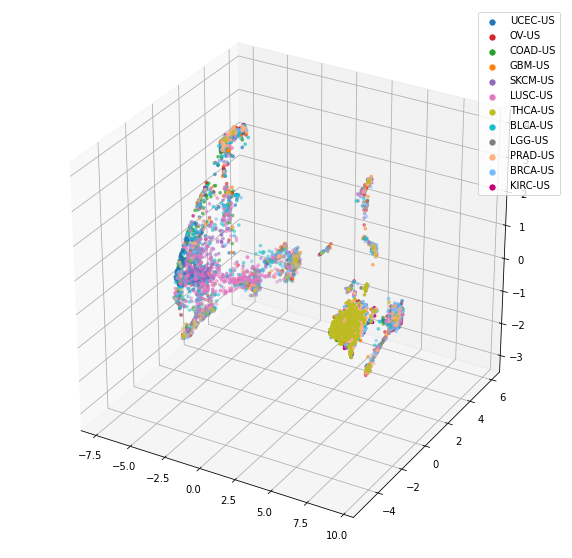

In [55]:
plot_umap_results(umap_reduced, sampled_y, cancer_type_reverse_dict)

In [60]:
tsne = TSNE(n_components=3, perplexity=35)

In [61]:
tsne_reduced = tsne.fit_transform(svd_reduced)

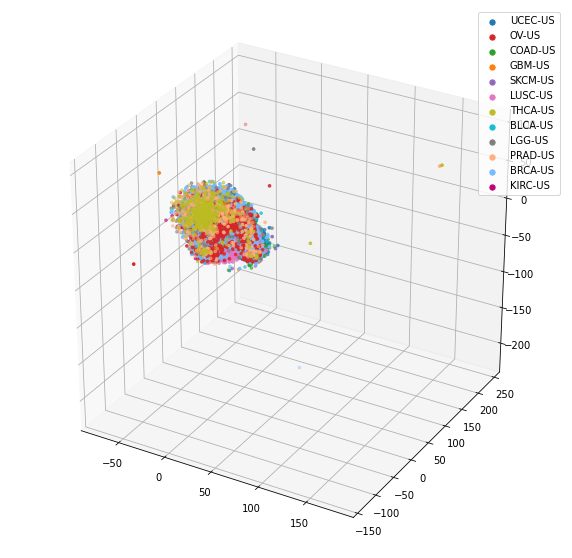

In [62]:
plot_umap_results(tsne_reduced, sampled_y, cancer_type_reverse_dict)

In [170]:
merged_encodings.to_csv("Final_Merged_Gene_Encodings.csv")